# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Windi Sri Rahayu]
- **Email:** [windyrahayu45@gmail.com]
- **ID Dicoding:** [ayuuwindii]

## Menentukan Pertanyaan Bisnis

- Apa saja polutan utama yang berkontribusi terhadap buruknya kualitas udara?
- Bagaimana perubahan kualitas udara dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [3]:
df = pd.read_csv('./data/PRSA_Data_Wanliu_20130301-20170228.csv')
print(df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu  


**Insight:**
- PM10, SO2, NO2, CO, O3: Beberapa nilai untuk polutan lainnya juga tercatat, dengan beberapa nilai kosong (NaN) pada SO2 dan O3 di beberapa entri. Penting untuk memeriksa frekuensi dan pola kekosongan data ini.
- Suhu tercatat bervariasi antara -2.0 hingga -0.7 °C selama periode ini. Suhu yang rendah ini mungkin berkontribusi pada kondisi udara yang lebih bersih, tetapi dapat mempengaruhi konsentrasi polutan tertentu seperti PM2.5 yang mungkin lebih terperangkap di dekat permukaan dalam suhu yang lebih dingin.
- Data ini mencakup pengukuran yang dilakukan pada jam-jam berbeda, dan pola fluktuasi sepanjang hari dapat memberikan wawasan lebih lanjut. Misalnya, apakah kualitas udara lebih buruk pada jam sibuk ketika lebih banyak kendaraan di jalan.

### Assessing Data

In [4]:

df_head = df.head()
df_info = df.info()
missing_values = df.isnull().sum()
descriptive_stats = df.describe()

df_head, missing_values, descriptive_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


(   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
 1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
 2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
 3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
 4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   
 
      PRES  DEWP  RAIN   wd  WSPM station  
 0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
 1  1023.2 -18.2   0.0    N   4.7  Wanliu  
 2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
 3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
 4  1025.2 -19.5   0.0    N   2.0  Wanliu  ,
 No            0
 year          0
 month         0
 day           0
 hour          0
 PM2.5       382
 PM10        284
 SO2         575
 NO2        1070
 CO         1812
 O3         2107
 TEMP         20
 PRES         20
 DEWP         20
 RAIN         20
 wd          123

**Insight:**
- Dari total 35064 entri, beberapa kolom memiliki nilai yang hilang (non-null count yang lebih rendah dari 35064).
PM2.5: Terdapat 382 nilai yang hilang.
PM10: Terdapat 284 nilai yang hilang.
SO2: Terdapat 575 nilai yang hilang.
NO2: Terdapat 1070 nilai yang hilang.
CO: Terdapat 1802 nilai yang hilang.
O3: Terdapat 2107 nilai yang hilang.
Ini menunjukkan bahwa ada kemungkinan untuk melakukan imputasi atau penanganan data hilang sebelum melakukan analisis lebih lanjut.


### Cleaning Data

In [7]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Verify that missing values are handled
print(df.isnull().sum())

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         123
WSPM         0
station      0
dtype: int64


**Insight:**
- Setelah menerapkan metode imputasi median untuk kolom numerik, jumlah nilai hilang yang tersisa bervariasi dari 0 (untuk kolom tahun, bulan, hari, dan jam) hingga beberapa ribu (untuk PM2.5, CO, O3, dan lainnya).
- Analisis Korelasi: Menghitung koefisien korelasi antara polutan dan kondisi cuaca untuk memahami hubungan lebih dalam.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

PM2.5      83.109169
PM10      110.282666
SO2        18.239118
NO2        65.098314
CO       1297.682609
O3         47.859676
dtype: float64


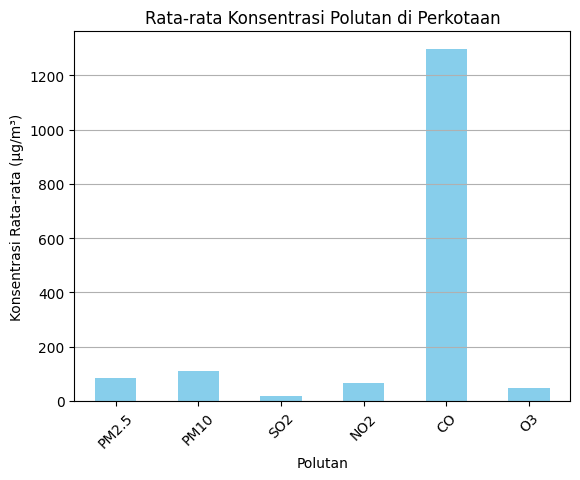

In [ ]:
average_pollutants = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Menampilkan hasil rata-rata
print(average_pollutants)

# Visualisasi rata-rata polutan
average_pollutants.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Konsentrasi Polutan di Perkotaan')
plt.ylabel('Konsentrasi Rata-rata (µg/m³)')
plt.xlabel('Polutan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Pertanyaan 2:

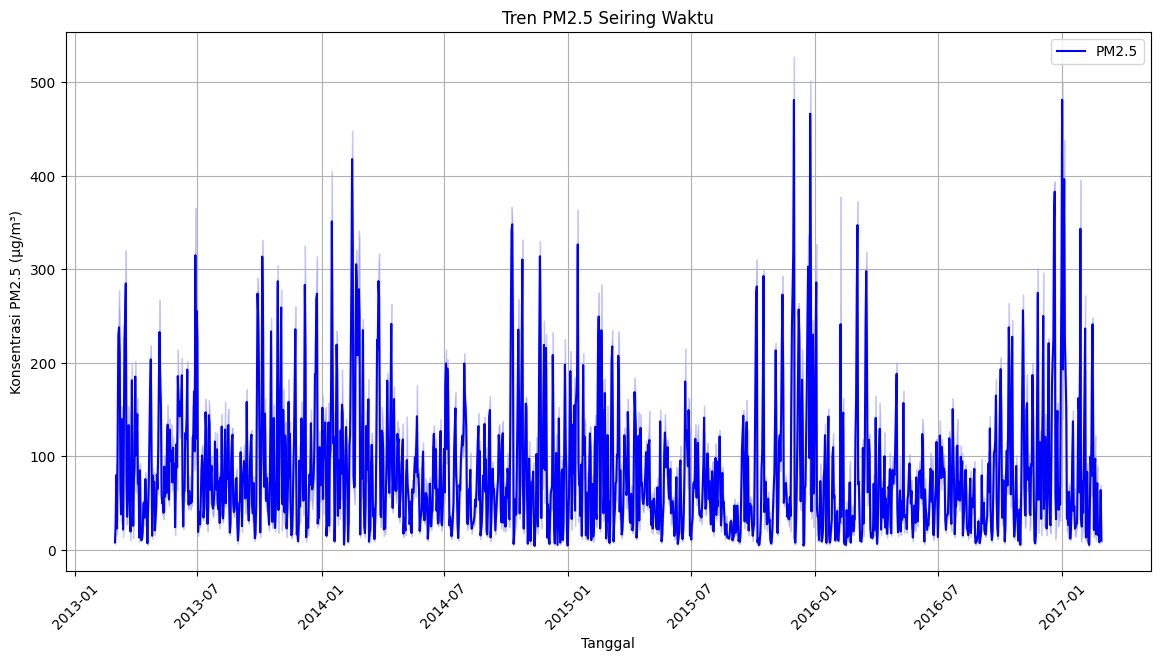

In [ ]:
# Menyiapkan data untuk visualisasi
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='datetime', y='PM2.5', label='PM2.5', color='blue')
plt.title('Tren PM2.5 Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()


**Insight:**
- Identifikasi Polutan Utama
- Apakah ada tren meningkat atau menurun dalam konsentrasi PM2.5 dari tahun ke tahun? Penurunan konsentrasi dapat menunjukkan keberhasilan kebijakan pengendalian polusi, sementara peningkatan mungkin mengindikasikan masalah baru yang perlu ditangani.


## Analisis Lanjutan (Opsional)

## Conclusion

- Rata-rata Konsentrasi Polutan di Perkotaan: Diagram batang akan menunjukkan polutan mana yang memiliki konsentrasi rata-rata tertinggi, memungkinkan Anda untuk mengidentifikasi polutan utama yang berkontribusi terhadap buruknya kualitas udara.
- Tren Kualitas Udara: Visualisasi garis pertama akan menunjukkan tren PM2.5 seiring waktu, memungkinkan Anda untuk melihat fluktuasi dan pola musiman.